In [ ]:
import akshare as ak

fund = ak.fund_name_em()

print(fund.info())

In [ ]:
print(fund[['基金代码','基金简称', '基金类型']])

In [ ]:
index_fund = ak.fund_info_index_em(symbol="行业主题")
print(index_fund)

In [ ]:
fund_open= ak.fund_open_fund_daily_em()



In [ ]:
print(fund_open.loc[fund_open['基金代码'] == '161725'])

In [ ]:
fund_etf_hist = ak.fund_etf_hist_sina(symbol="sz161725")

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fund_etf_hist['close'].plot(kind='line')

In [ ]:
profit_y = ak.stock_profit_sheet_by_yearly_em(symbol='sz000858')

In [ ]:
profit_y['REPORT_DATE']

In [ ]:
profit_y['REPORT_DATE'] = pd.to_datetime(profit_y['REPORT_DATE']).dt.date
profit_y[['REPORT_DATE', 'PARENT_NETPROFIT']].sort_values(by='REPORT_DATE', ascending=True).plot.bar(x='REPORT_DATE', y='PARENT_NETPROFIT')

In [ ]:
stock = ak.stock_zh_a_hist(symbol="000858", period="daily", start_date="19950101")

In [ ]:
cl = stock[['日期', '收盘']]
cl
cl['日期'] = pd.to_datetime(cl['日期'])
cl.set_index('日期')
daily_ret = cl['收盘'].pct_change()
print(cl.info())
# monthly_ret = cl.resample('M').apply(lambda x : ((1+x).prod() - 1))
# monthly_ret

In [ ]:
fund_etf_hist.index = fund_etf_hist['date']
print(fund_etf_hist)

In [ ]:
import pandas as pd


print(pd.__version__)

In [ ]:
import pandas._testing as tm

df = tm.makeTimeDataFrame()
print(df)
# print(df.shape)


In [ ]:
np_a = df.to_numpy()
print(np_a[0:5,0])

In [ ]:
index = pd.date_range('1/1/2023', periods=4, freq='T')
s = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s': s})
df

unsample this into 30 seconds bins

In [ ]:
df.asfreq(freq='30S')

provide a fill_value

In [ ]:
df.asfreq(freq='30S', fill_value=9.0)

provide a method

In [ ]:
df.asfreq(freq='30S', method='bfill')

In [ ]:
import numpy as np

day_index = pd.date_range('2023-01-01', periods=30, freq='D')
day_s = pd.Series(np.random.randn(30), index=day_index)
day_df = pd.DataFrame({'s': day_s})
day_df


In [ ]:
day_df.asfreq(freq='15D')

In [ ]:
import akshare as ak

stock_sse_summary_df = ak.stock_sse_summary()
print(stock_sse_summary_df)



<AxesSubplot: xlabel='date'>

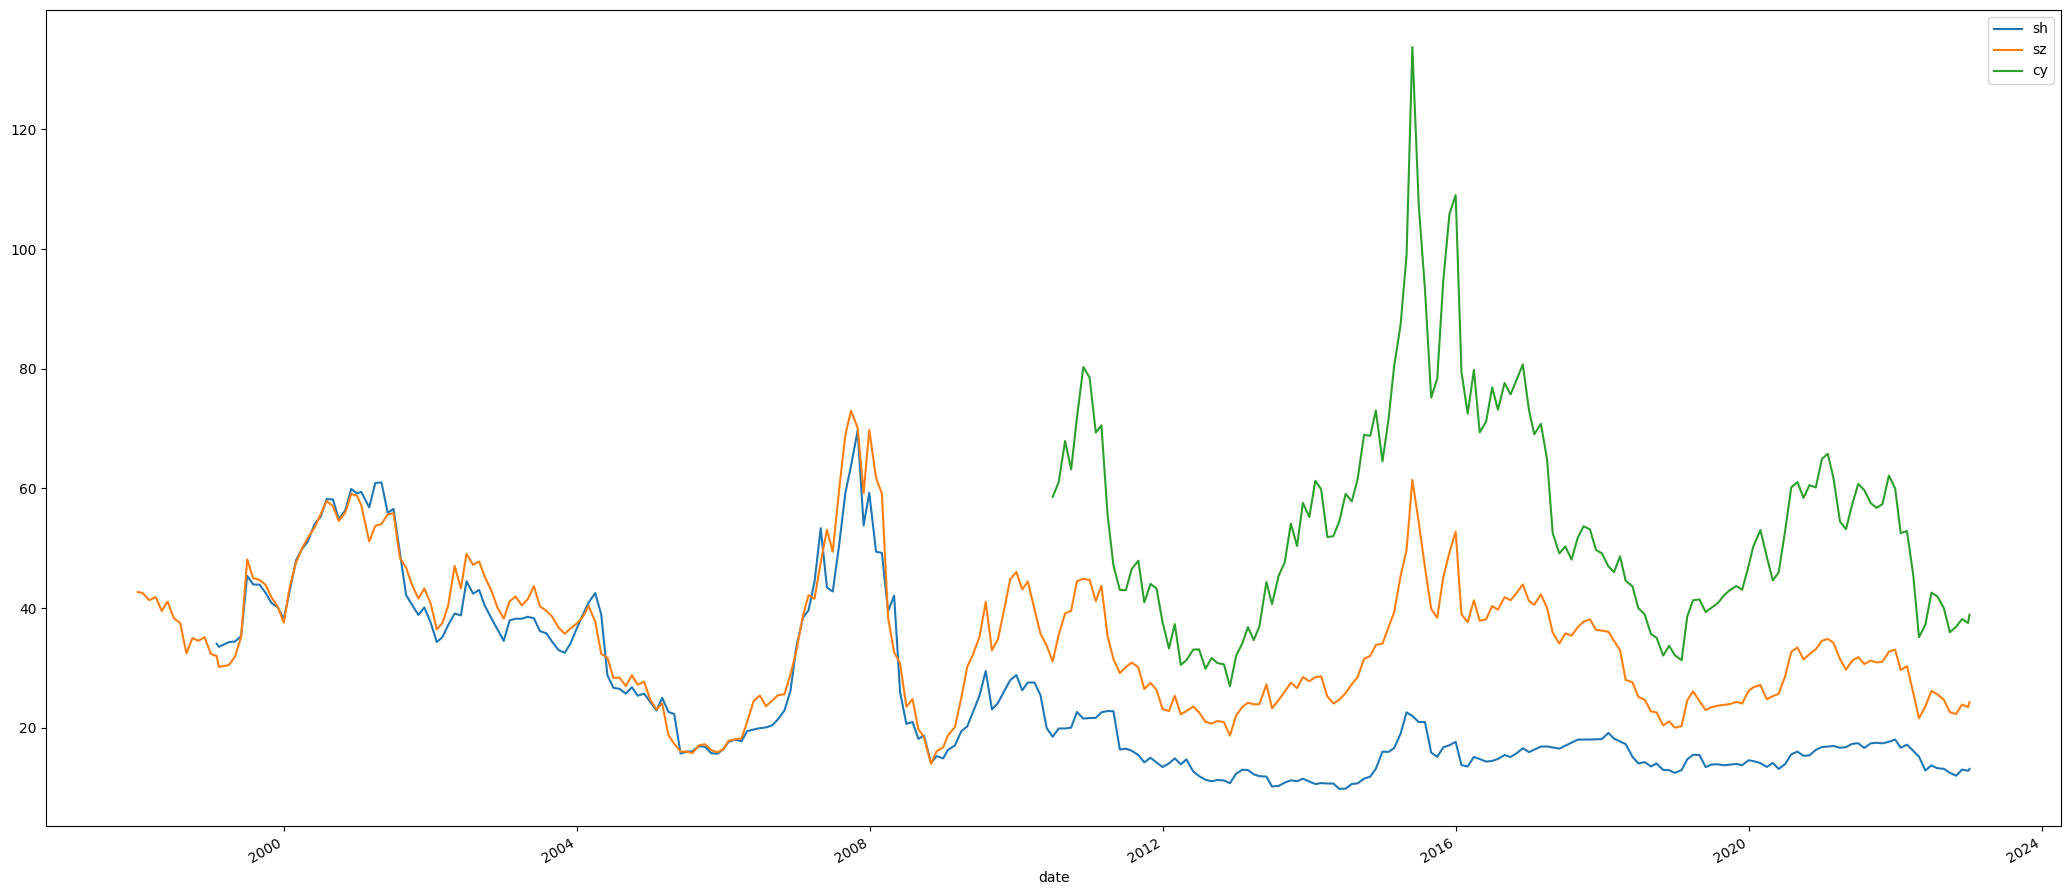

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import akshare as ak

stock_a_pe_all_df = ak.stock_a_pe(symbol="all")
stock_a_pe_300_df = ak.stock_a_pe(symbol="000300.XSHG")
stock_a_pe_cy_df = ak.stock_a_pe(symbol="cy")
stock_a_pe_kc_df = ak.stock_a_pe(symbol="kc")
stock_a_pe_sh_df = ak.stock_a_pe(symbol="sh")
stock_a_pe_sz_df = ak.stock_a_pe(symbol="sz")

stock_a_pe_sh_df.to_csv("sh_pe.csv")
stock_a_pe_sz_df.to_csv("sz_pe.csv")
stock_a_pe_300_df.to_csv("hs_pe.csv")
stock_a_pe_cy_df.to_csv("cy_pe.csv")
stock_a_pe_kc_df.to_csv("kc_pe.csv")
stock_a_pe_all_df.to_csv("all_pe.csv")

stock_pe_sh_df = pd.DataFrame({
    "sh": list(stock_a_pe_sh_df["pe"])
}, index=pd.to_datetime(stock_a_pe_sh_df['date']))

stock_pe_sz_df = pd.DataFrame({
    "sz": list(stock_a_pe_sz_df["pe"])
}, index=pd.to_datetime(stock_a_pe_sz_df['date']))

stock_pe_hs_df = pd.DataFrame({
    "hs300": list(stock_a_pe_300_df["averagePETTM"])
}, index=pd.to_datetime(stock_a_pe_300_df['date']))

stock_pe_cy_df = pd.DataFrame({
    "cy": list(stock_a_pe_cy_df["pe"])
}, index=pd.to_datetime(stock_a_pe_cy_df['date']))

stock_pe_kc_df = pd.DataFrame({
    "kc": list(stock_a_pe_kc_df["pe"])
}, index=pd.to_datetime(stock_a_pe_kc_df['date']))

stock_pe_all_df = pd.DataFrame({
    "all": list(stock_a_pe_all_df["averagePETTM"])
}, index=pd.to_datetime(stock_a_pe_all_df['date']))


# print(stock_pe_sh_df)
# print(stock_pe_hs_df)
# stock_pe_df = pd.concat([stock_pe_sh_df,stock_pe_sz_df,stock_pe_hs_df,stock_pe_cy_df,stock_pe_kc_df,stock_pe_all_df], axis=1)
stock_pe_df = pd.concat([stock_pe_sh_df,stock_pe_sz_df,stock_pe_cy_df], axis=1)
# print(stock_pe_df)

stock_pe_df.plot(kind='line', figsize=(26, 12))
# plt.axhline(y=, color='r', linestyle='-')

In [65]:
# print(stock_a_pe_df["2007":"2009"][['averagePELYR']].min())
# print(stock_a_pe_df["2014":"2018"][['averagePELYR']].min())
# min = stock_a_pe_df["2021":"2023"][['averagePELYR']].min()
# stock_a_pe_df[stock_a_pe_df['averagePELYR'].astype(float) <= 40]

# print(stock_pe_sh_df['2022-08':'2023'])
# print(stock_pe_sz_df['2022-08':'2023'])
# print(stock_pe_cy_df['2022-08':'2023'])

print(stock_pe_sh_df['2017':].min())
print(stock_pe_sz_df['2017':].min())
print(stock_pe_cy_df['2017':].min())


print(stock_pe_sh_df.last('1D') )
print(stock_pe_sz_df.last('1D'))
print(stock_pe_cy_df.last('1D'))


# print(stock_pe_sh_df.last('1D') / stock_pe_sh_df['2017':].min() - 1)
# print(stock_pe_sz_df.last('1D') / stock_pe_sz_df['2017':].min() - 1)
# print(stock_pe_cy_df.last('1D') / stock_pe_cy_df['2017':].min() - 1)

sh    11.96
dtype: float64
sz    20.0
dtype: float64
cy    31.27
dtype: float64
               sh
date             
2023-01-06  13.08
               sz
date             
2023-01-06  24.25
               cy
date             
2023-01-06  38.89


In [127]:
sz_de = stock_pe_sz_df[:].describe()
cy_de = stock_pe_cy_df[:].describe()
sh_de = stock_pe_sh_df[:].describe()

print(sz_de)
print(cy_de)
print(sh_de)


               sz
count  302.000000
mean    34.450563
std     11.352601
min     13.950000
25%     25.150000
50%     32.985000
75%     41.287500
max     72.970000
               cy
count  152.000000
mean    54.585526
std     18.320134
min     26.910000
25%     40.905000
50%     51.925000
75%     64.595000
max    133.760000
               sh
count  289.000000
mean    24.617405
std     13.857118
min      9.760000
25%     14.700000
50%     18.000000
75%     34.370000
max     69.640000


In [125]:
print("沪市: 当前：{}、均值：{}、最小：{}、25%：{}、50%：{}、75%：{}、最大：{}".format(stock_pe_sh_df.iloc[-1]['sh'], round(sh_de.loc['mean', 'sh'], 2), round(sh_de.loc['min', 'sh'], 2), round(sh_de.loc['25%', 'sh'],2), round(sh_de.loc['50%', 'sh'],2), round(sh_de.loc['75%', 'sh'],2), round(sh_de.loc['max', 'sh'],2)))
print("深圳: 当前：{}、均值：{}、最小：{}、25%：{}、50%：{}、75%：{}、最大：{}".format(stock_pe_sz_df.iloc[-1]['sz'], round(sz_de.loc['mean', 'sz'], 2), round(sz_de.loc['min', 'sz'], 2), round(sz_de.loc['25%', 'sz'],2), round(sz_de.loc['50%', 'sz'],2), round(sz_de.loc['75%', 'sz'],2), round(sz_de.loc['max', 'sz'],2)))
print("创业: 当前：{}、均值：{}、最小：{}、25%：{}、50%：{}、75%：{}、最大：{}".format(stock_pe_cy_df.iloc[-1]['cy'], round(cy_de.loc['mean', 'cy'], 2), round(cy_de.loc['min', 'cy'], 2), round(cy_de.loc['25%', 'cy'],2), round(cy_de.loc['50%', 'cy'],2), round(cy_de.loc['75%', 'cy'],2), round(cy_de.loc['max', 'cy'],2)))

沪市: 当前：13.08、均值：24.62、最小：9.76、25%：14.7、50%：18.0、75%：34.37、最大：69.64
深圳: 当前：24.25、均值：34.45、最小：13.95、25%：25.15、50%：32.98、75%：41.29、最大：72.97
创业: 当前：38.89、均值：54.59、最小：26.91、25%：40.9、50%：51.92、75%：64.6、最大：133.76


In [69]:
sz_de

,sz
count,302.000000
mean,34.450563
std,11.352601
min,13.950000
25%,25.150000
50%,32.985000
75%,41.287500
max,72.970000
